### 导入pytorch包

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### 定义需要拟合的函数

In [40]:
def true_function(x):
    return 3*x**3+ x**2 + 2*x + 1

### 生成训练集和测试集

In [41]:
torch.manual_seed(0) # 保证实验结果可以复现

# 采样1000个点作为训练集
x_train = torch.tensor(np.random.uniform(-10, 10, 1000), dtype=torch.float32).view(-1, 1)
y_train = true_function(x_train)

# 采样200个点作为测试集
x_test = torch.tensor(np.random.uniform(-10, 10, 200), dtype=torch.float32).view(-1, 1)
y_test = true_function(x_test)


### 定义神经网络模型

In [42]:
class FeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [43]:
# 实例化模型
input_size = 1
hidden_size = 64
model = FeedForwardNN(input_size, hidden_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### 训练

In [44]:
from tqdm import trange
num_epochs = int(1e4)
model.train()
for epoch in trange(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


100%|██████████| 10000/10000 [00:03<00:00, 2980.19it/s]


### 测试

Test Loss: 4.8799


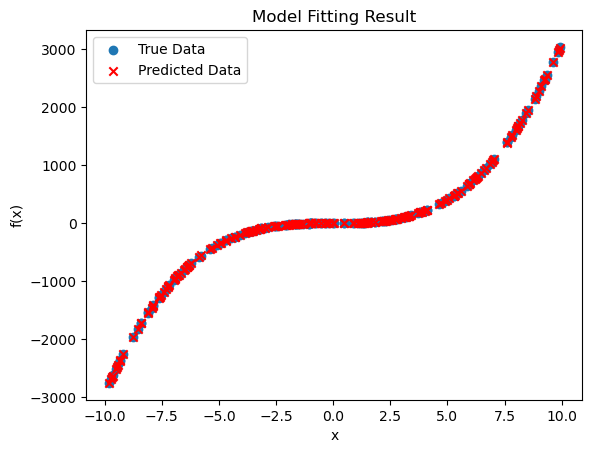

In [45]:
# 在测试集上评估模型
model.eval()
with torch.no_grad():
    outputs = model(x_test)
    test_loss = criterion(outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# 绘制拟合效果
plt.scatter(x_test.numpy(), y_test.numpy(), label='True Data')
plt.scatter(x_test.numpy(), outputs.numpy(), color='red', marker='x', label='Predicted Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Model Fitting Result')
plt.show()